# Copa América - Brasil vs. Colômbia

## Configurações

In [1]:
import pandas as pd
import utils
pd.set_option("display.max_columns", None)

df_goalscorers = pd.read_csv("data/goalscorers.csv")
df_results = pd.read_csv("data/results.csv")

df_goalscorers['date'] = pd.to_datetime(df_goalscorers['date'])
df_results['date'] = pd.to_datetime(df_results['date'])

In [2]:
df_goalscorers.sample(3)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
36652,2017-03-24,Liechtenstein,North Macedonia,North Macedonia,Ilija Nestorovski,73.0,False,False
24639,2004-10-09,Venezuela,Brazil,Venezuela,Ruberth Morán,79.0,False,False
20603,2001-03-25,Malaysia,Palestine,Malaysia,Akmal Rizal Ahmad Rakhli,62.0,False,True


In [3]:
df_results.sample(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
37716,2014-06-01,Iraqi Kurdistan,Arameans Suryoye,1.0,2.0,CONIFA World Football Cup,Östersund,Sweden,True
42397,2019-06-05,Portugal,Switzerland,3.0,1.0,UEFA Nations League,Porto,Portugal,False
47241,2024-06-11,South Sudan,Sudan,0.0,3.0,FIFA World Cup qualification,Juba,South Sudan,False


## Análises

### Resultados

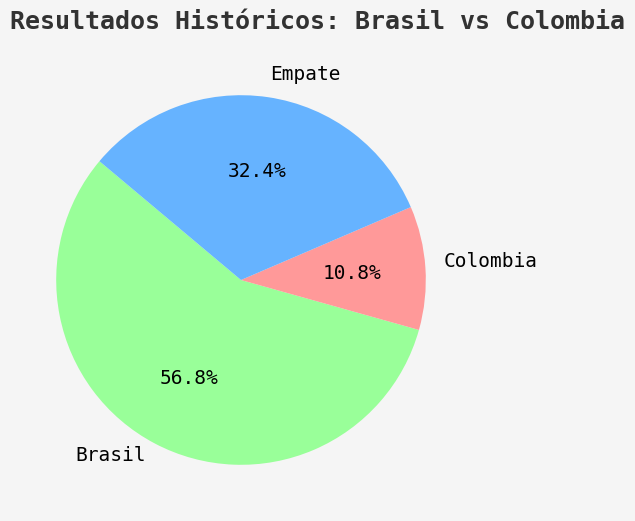

In [4]:
outcome_df = utils.calculate_match_outcomes(df_results)
utils.create_pie_chart(
    outcome_df,
    labels_col="Resultado",
    values_col="Percentual",
    title="Resultados Históricos: Brasil vs Colombia",
    figsize=(6, 6),
    colors=['#99ff99','#ff9999','#66b3ff']
)

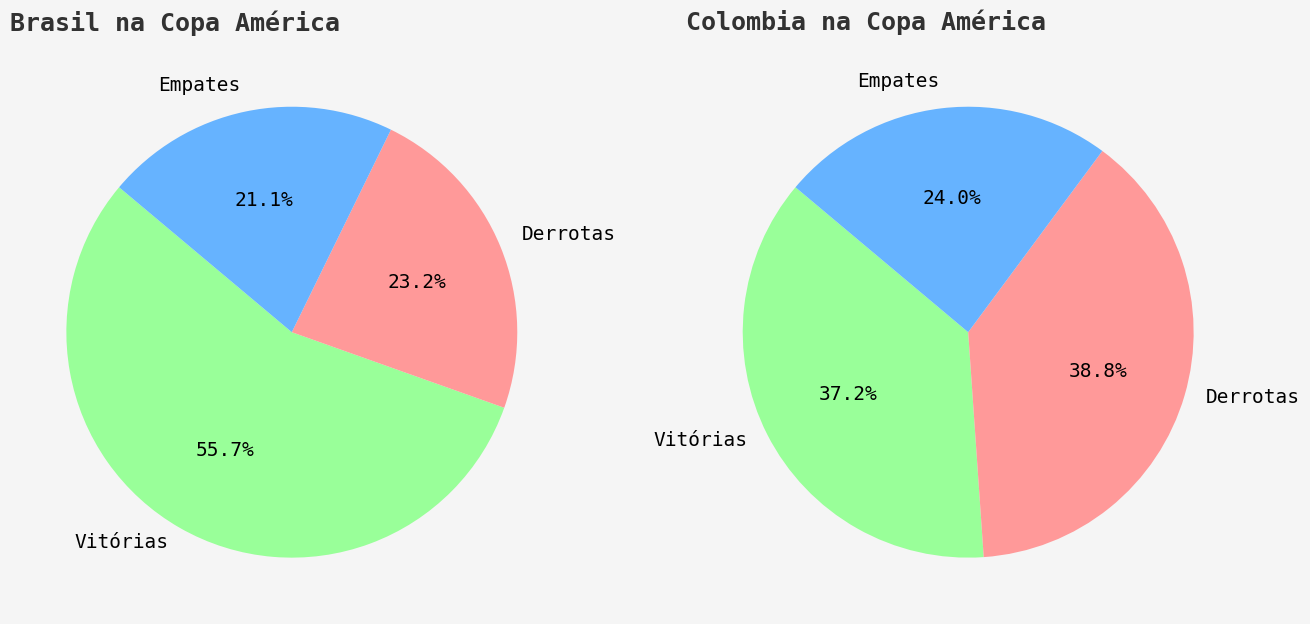

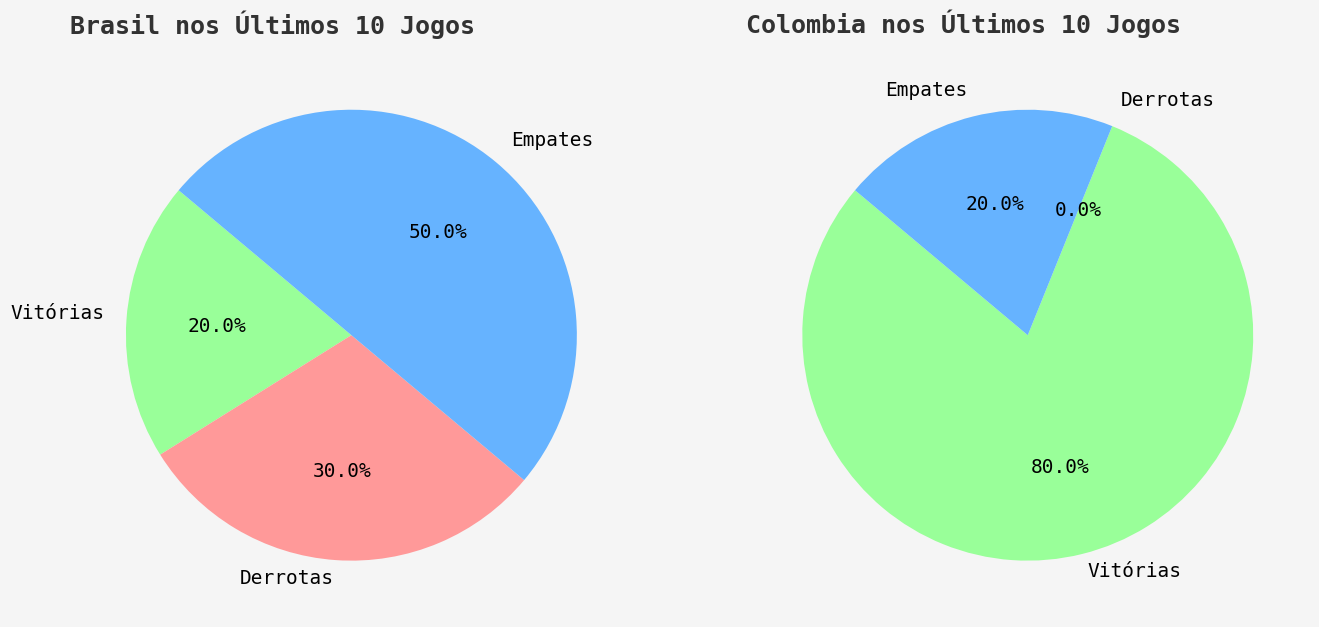

In [5]:
performance_brazil_copa_america = utils.calculate_team_performance(df_results, 'Brazil', tournament='Copa América')
performance_colombia_copa_america = utils.calculate_team_performance(df_results, 'Colombia', tournament='Copa América')

performance_brazil_last_10 = utils.calculate_team_performance(df_results, 'Brazil', last_n_games=10)
performance_colombia_last_10 = utils.calculate_team_performance(df_results, 'Colombia', last_n_games=10)

utils.create_side_by_side_pie_charts(
    performance_brazil_copa_america,
    performance_colombia_copa_america,
    labels_col='Resultado',
    values_col='Percentual',
    title1='Brasil na Copa América',
    title2='Colombia na Copa América',
    figsize=(16, 8),
    colors=['#99ff99','#ff9999','#66b3ff']
)

utils.create_side_by_side_pie_charts(
    performance_brazil_last_10,
    performance_colombia_last_10,
    labels_col='Resultado',
    values_col='Percentual',
    title1='Brasil nos Últimos 10 Jogos',
    title2='Colombia nos Últimos 10 Jogos',
    figsize=(16, 8),
    colors=['#99ff99','#ff9999','#66b3ff']
)

<div class="alert alert-block alert-info">
<b>Análises:</b> Historicamente, o Brasil sem dúvidas é favorito. O Brasil tem ampla vantagem contra a Colômbia: ganhou 56% das partidas, enquanto a Colômbia ganhou apenas em 11% das vezes do Brasil. Além disso, o Brasil também ganhou 56% de seus jogos na Copa América e a Colômbia ganhou apenas 37%. O que equilibra o confronto é o momento. A Colômbia ganhou 8 dos últimos 10 jogose empatou os outros 2, enquanto o Brasil está em uma fase bastante irregular com apenas duas vitórias em 10 jogos.</div>

### Gols

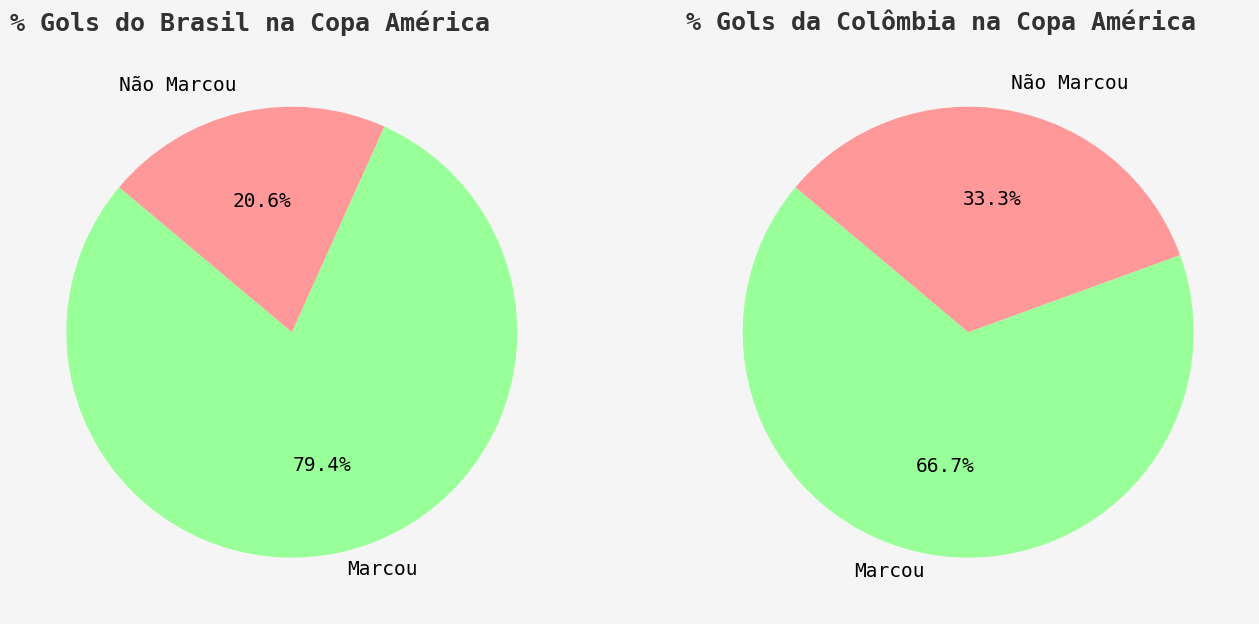

In [6]:
goal_percentage_brazil = utils.calculate_goal_percentage(df_results, 'Brazil', tournament='Copa América')
goal_percentage_colombia = utils.calculate_goal_percentage(df_results, 'Colombia', tournament='Copa América')

utils.create_side_by_side_pie_charts(
    goal_percentage_brazil,
    goal_percentage_colombia,
    labels_col='Resultado',
    values_col='Percentual',
    title1='% Gols do Brasil na Copa América',
    title2='% Gols da Colômbia na Copa América',
    figsize=(16, 8),
    colors=['#99ff99','#ff9999']
)


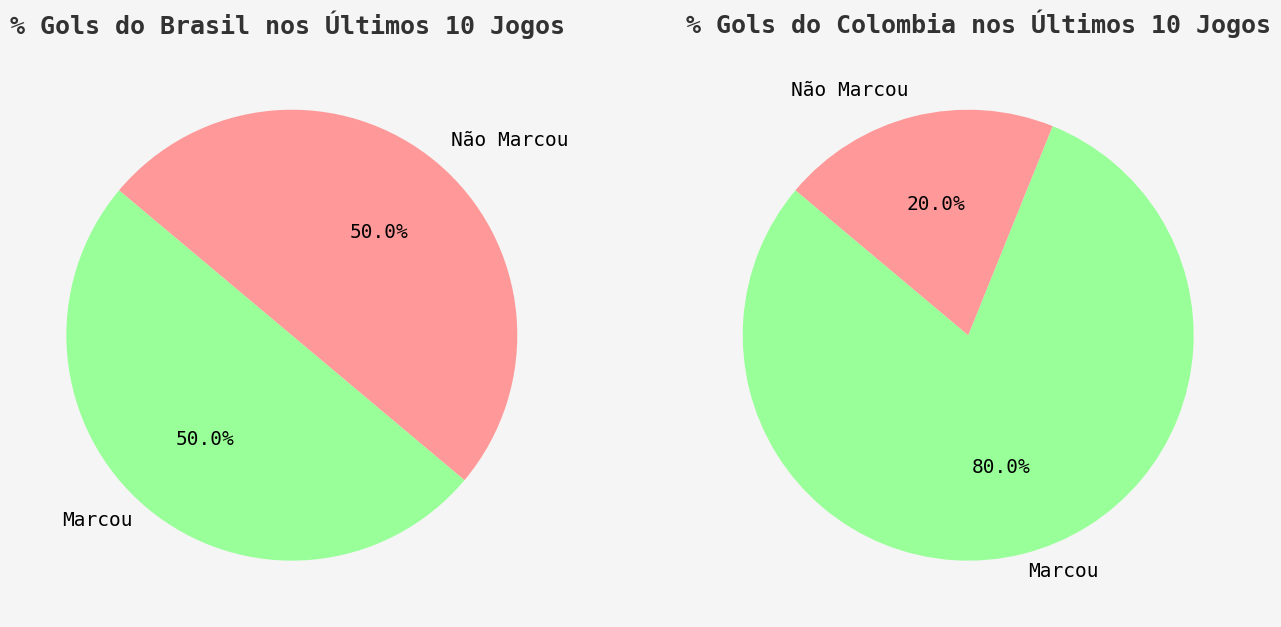

In [7]:
# Calcular os percentuais de gols para Brasil e Colômbia nos últimos 10 jogos
goal_percentage_brazil_last_10 = utils.calculate_recent_goal_percentage(df_results, 'Brazil', last_n_games=10)
goal_percentage_colombia_last_10 = utils.calculate_recent_goal_percentage(df_results, 'Colombia', last_n_games=10)

# Criar gráficos de pizza lado a lado
utils.create_side_by_side_pie_charts(
    goal_percentage_brazil_last_10,
    goal_percentage_colombia_last_10,
    labels_col='Resultado',
    values_col='Percentual',
    title1='% Gols do Brasil nos Últimos 10 Jogos',
    title2='% Gols do Colombia nos Últimos 10 Jogos',
    figsize=(16, 8),
    colors=['#99ff99','#ff9999']
)

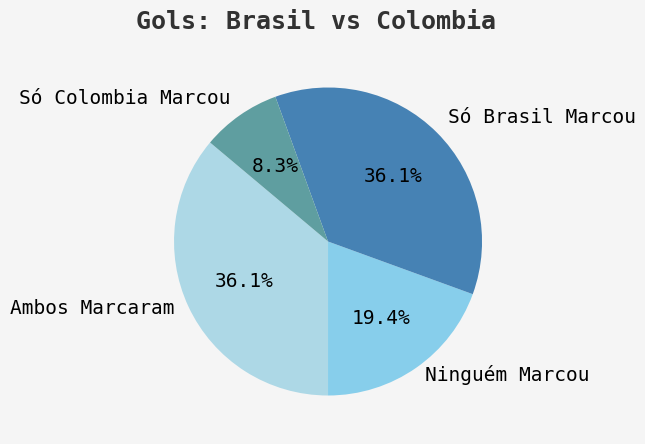

In [8]:
goal_scenarios = utils.calculate_goal_scenarios(df_results, home_team='Brazil', away_team='Colombia')

utils.create_pie_chart(
    goal_scenarios,
    labels_col='Cenário',
    values_col='Percentual',
    title='Gols: Brasil vs Colombia',
    figsize=(5, 5),
    colors=['#add8e6','#87ceeb','#4682b4','#5f9ea0']
)

<div class="alert alert-block alert-info">
<b>Análises:</b> Em menos de 20% dos jogos entre Brasil e Colômbia não tiveram gols. A Colômbia também marcou em 8 dos seus últimos 10 jogos O Brasil, apesar de ter camapanha recente irregular, é um time ofensivo, então ao que tudo indica são altas as chances de ter bola na rede</div>

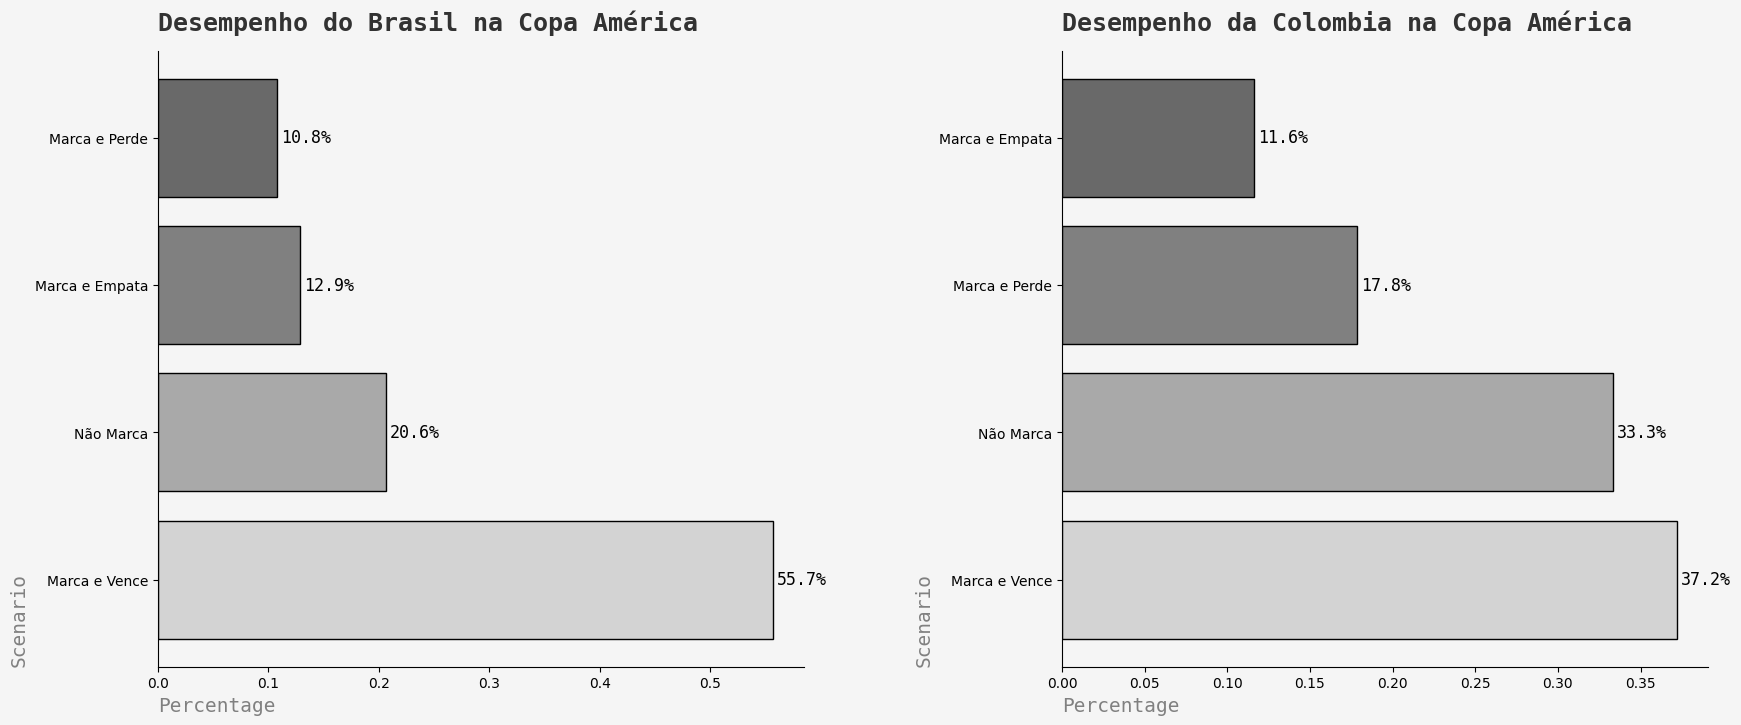

In [9]:
stats_brazil = utils.calculate_team_statistics(df_results, 'Brazil', tournament='Copa América')
stats_colombia = utils.calculate_team_statistics(df_results, 'Colombia', tournament='Copa América')

utils.create_horizontal_bar_plot(
    stats_brazil,
    stats_colombia,
    labels_col='Cenário',
    values_col='Percentual',
    title1='Desempenho do Brasil na Copa América',
    title2='Desempenho da Colombia na Copa América',
    figsize=(20, 8),
    colors=['#d3d3d3','#a9a9a9','#808080','#696969']
)

### Quando Saem os Gols

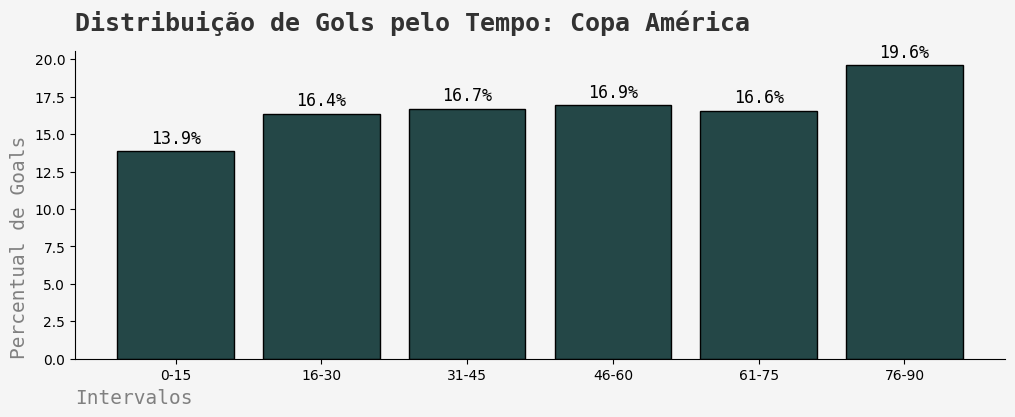

In [10]:
goal_intervals = utils.calculate_goal_intervals(df_goalscorers, df_results)

utils.create_vertical_bar_plot(
    goal_intervals,
    x='Intervalo',
    y='Percentual',
    title='Distribuição de Gols pelo Tempo: Copa América',
    xlabel='Intervalos',
    ylabel='Percentual de Goals',
    figsize=(12, 4),
    color="#244747"
)


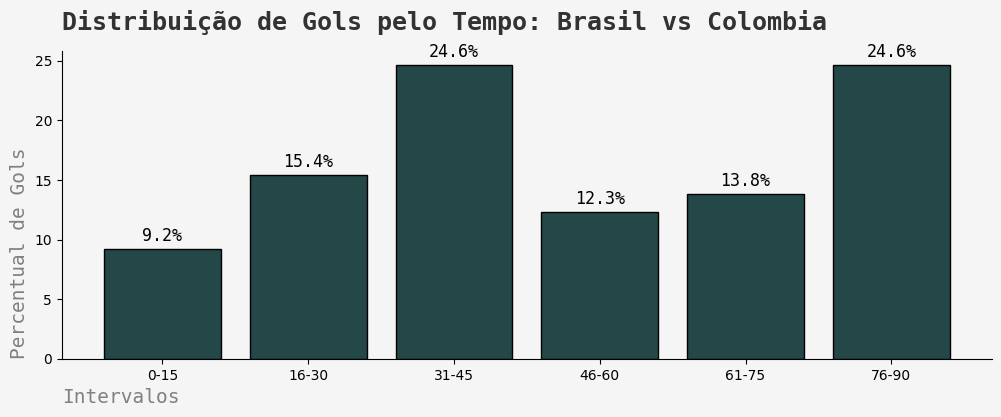

In [11]:
goal_intervals_brazil_colombia = utils.calculate_goal_intervals_brazil_colombia(df_goalscorers, df_results)

utils.create_vertical_bar_plot(
    goal_intervals_brazil_colombia,
    x='Intervalo',
    y='Percentual',
    title='Distribuição de Gols pelo Tempo: Brasil vs Colombia',
    xlabel='Intervalos',
    ylabel='Percentual de Gols',
    figsize=(12, 4),
    color="#244747"
)

<div class="alert alert-block alert-info">
<b>Análises:</b> Além de ter gols, é comum que eles sejam no último terço de cada tempo, ou seja, entre 31 e 45+ do primeiro tempo e entre 76 e 90+ no segundo tempo. Na história da Copa América, quase 20% saiu nos últimos 15 minutos de jogo. Entre Brasil e Colômbia, 50% dos gols são marcados no fim de cada tempo</div>

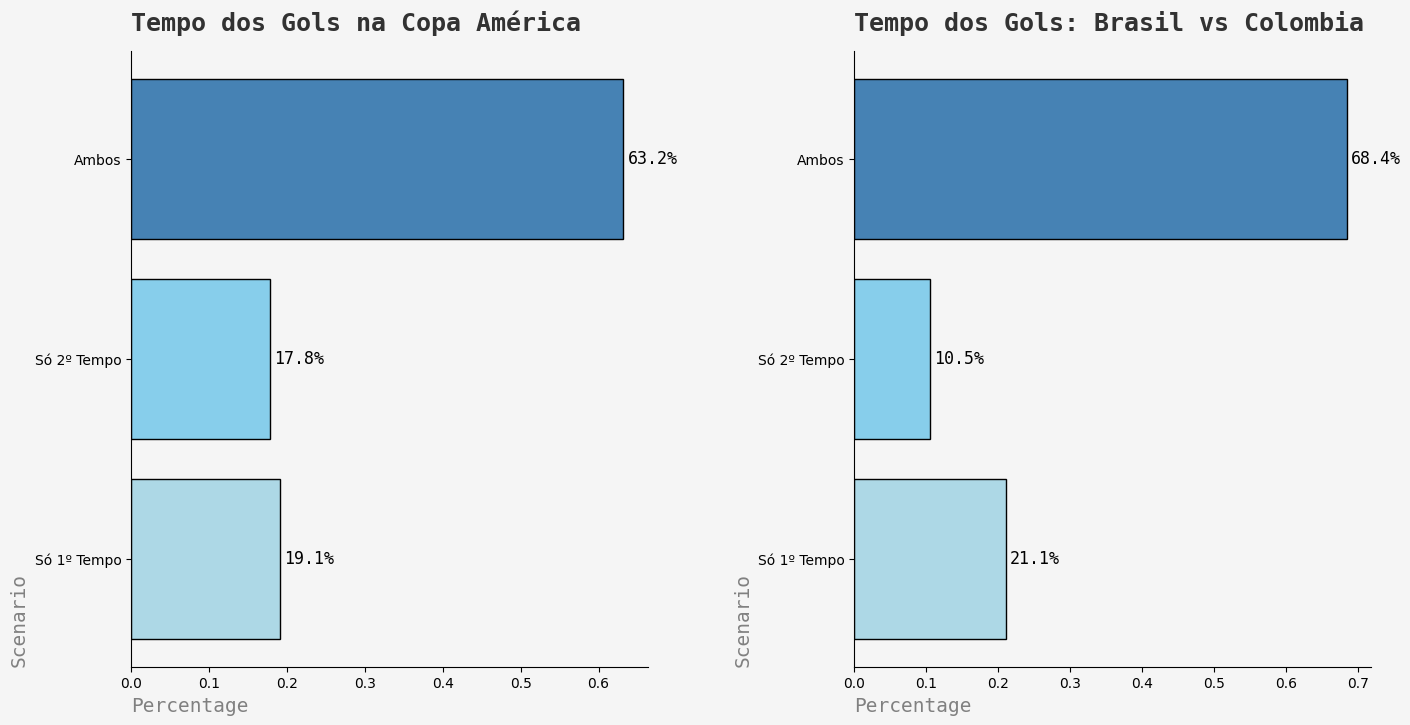

In [12]:
copa_matches = df_results[df_results['tournament'] == 'Copa América']
goal_times_copa_america = utils.calculate_goal_times(df_goalscorers, df_results, copa_matches)
matches_brazil_colombia = df_results[
    ((df_results['home_team'] == 'Brazil') & (df_results['away_team'] == 'Colombia')) |
    ((df_results['home_team'] == 'Colombia') & (df_results['away_team'] == 'Brazil'))
]
goal_times_brazil_colombia = utils.calculate_goal_times(df_goalscorers, df_results, matches_brazil_colombia)
utils.create_horizontal_bar_plot(
    goal_times_copa_america,
    goal_times_brazil_colombia,
    labels_col='Cenário',
    values_col='Percentual',
    title1='Tempo dos Gols na Copa América',
    title2='Tempo dos Gols: Brasil vs Colombia',
    figsize=(16, 8),
    colors=['#add8e6','#87ceeb','#4682b4','#5f9ea0']
)

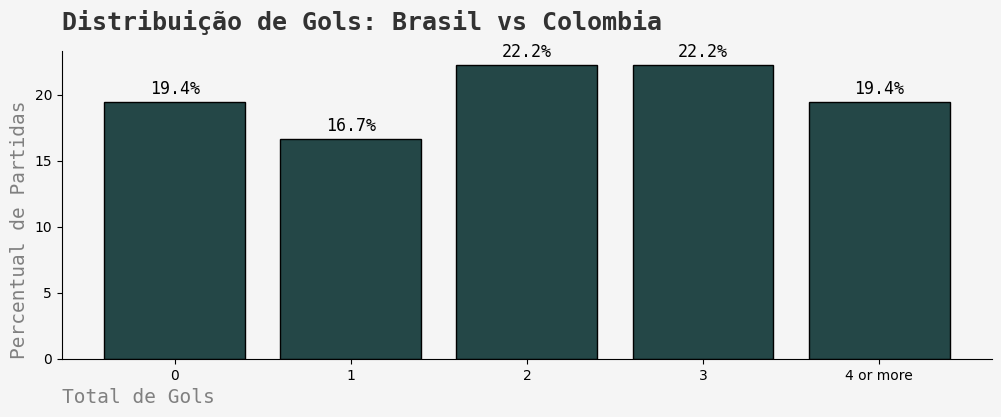

In [13]:
goal_distribution_brazil_colombia = utils.calculate_goal_distribution_brazil_colombia(df_results)

utils.create_vertical_bar_plot(
    goal_distribution_brazil_colombia,
    x='Gols',
    y='Percentual',
    title='Distribuição de Gols: Brasil vs Colombia',
    xlabel='Total de Gols',
    ylabel='Percentual de Partidas',
    figsize=(12, 4),
    color="#244747"
)